In [ ]:
import pickle
import pandas as pd

with open('data_pickle_format/synethetic_vacancies_final.pickle', 'rb') as f:
    df = pickle.load(f)   
    
df['title'] = df['job_description'].str.extract(
    r'(?:Job\s*Title|Title):\s*(.*?)(?:\.|\n)\s*(?:Job\s*Description|Description):', 
    expand=False
)
df['description'] = df['job_description'].str.extract(r'(?:Job\s*Description|Description):\s*(.*)', expand=False)


In [ ]:
import re
from string import punctuation
import html

with open('data_pickle_format/labeled_vacancies_final.pickle', 'rb') as f:
    real_df = pickle.load(f) 

def preprocess_text(text):
    text = text.lower()
    text = html.unescape(text)
    text = re.sub(r"https?://\S+", "", text) # remove http links
    text = re.sub(r"<.*?>", " ", text) # remove html tags
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

real_df["description"] = real_df["description"].map(preprocess_text)
pd.set_option('display.max_colwidth', None)
real_df["description"].head(2)

0                                                                                                                                                                                                                                                                                                                                                                    company name ministerie van financi n belastingdienst job requirements   tmap next foundation  ervaring met projecten in een agile omgeving  senior tester met ervaring in testautomatisering 5 jaar  kennis en ervaring met agilescrum   wensen   testtooling robotframework  functioneel testen  integratietesten  performancetesten  kennis van xml mq db2  kennis van container platforms   location apeldoorn nederland none company info none compensation benefits   dit is een opdracht tussen de 32  36 uur per week de startdatum is in overleg en de looptijd van de opdracht is in eerste instantie tot 31 december 2023 waarna er optie tot verlenging

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")

filter_and_lemma = []

for text in df['description']:
    if pd.notnull(text): 
        doc = nlp(text)
        filter_and_lemma.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])
    else:
        filter_and_lemma.append([])  
df['lemmas'] = filter_and_lemma

NameError: name 'df' is not defined

In [4]:
counts_1_4 = df.loc[df['women_proportion'] <= 0.25]
counts_2_4 = df.loc[(df['women_proportion'] > 0.25) & (df['women_proportion'] <= 0.5)]
counts_3_4 = df.loc[(df['women_proportion'] > 0.5) & (df['women_proportion'] <= 0.75)]
counts_4_4 = df.loc[df['women_proportion'] > 0.75]


In [ ]:
from nltk import FreqDist
import numpy as np

lemmas_1 = counts_1_4['lemmas'].values
flat_1 = np.concatenate(lemmas_1).tolist()
 
freq_dic_1=FreqDist(flat_1)
display(freq_dic_1)

lemmas_2 = counts_2_4['lemmas'].values
flat_2_4 = np.concatenate(lemmas_2).tolist()
 
freq_dic_2=FreqDist(flat_2_4)
display(freq_dic_2)

lemmas_3 = counts_3_4['lemmas'].values
flat_3 = np.concatenate(lemmas_3).tolist()
 
freq_dic_3=FreqDist(flat_3)
display(freq_dic_3)

lemmas_4 = counts_4_4['lemmas'].values
flat_4_4 = np.concatenate(lemmas_4).tolist()
 
freq_dic_4=FreqDist(flat_4_4)
display(freq_dic_4)


FreqDist({'role': 67, 'drive': 58, 'work': 57, 'high': 54, 'analytical': 51, 'strong': 48, 'experience': 46, 'design': 40, 'require': 38, 'degree': 32, ...})

FreqDist({'work': 341, 'role': 339, 'team': 259, 'analytical': 255, 'technical': 242, 'skill': 240, 'strong': 232, 'experience': 232, 'high': 221, 'drive': 212, ...})

FreqDist({'work': 458, 'team': 432, 'skill': 286, 'role': 235, 'strong': 224, 'communication': 199, 'experience': 180, 'look': 154, 'development': 154, 'collaborative': 151, ...})

FreqDist({'work': 93, 'team': 80, 'skill': 50, 'help': 43, 'role': 41, 'communication': 36, 'collaborative': 34, 'detail': 33, 'build': 32, 'user': 32, ...})

<Axes: title={'center': 'Fourth Quarter'}, xlabel='Samples', ylabel='Counts'>

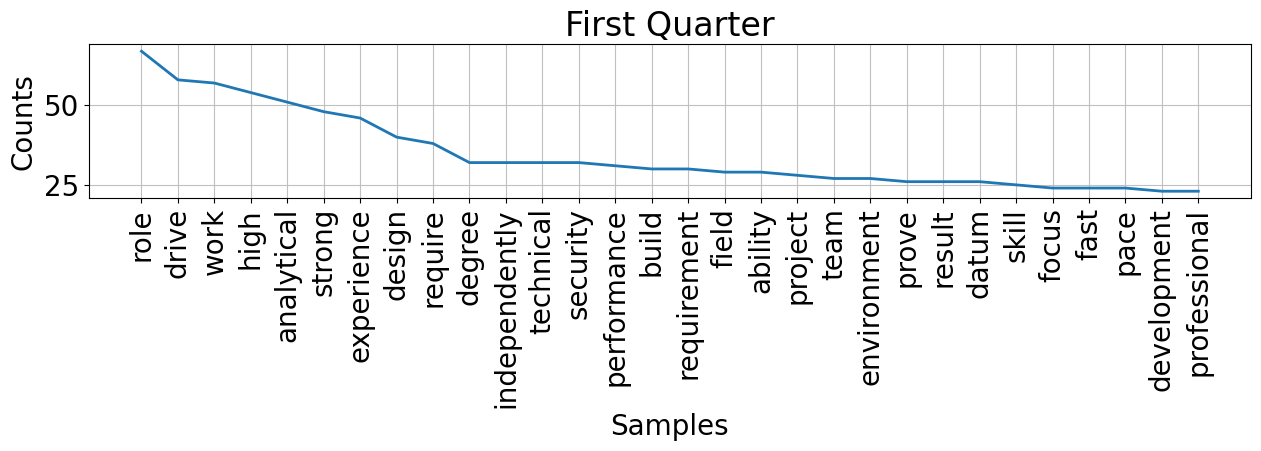

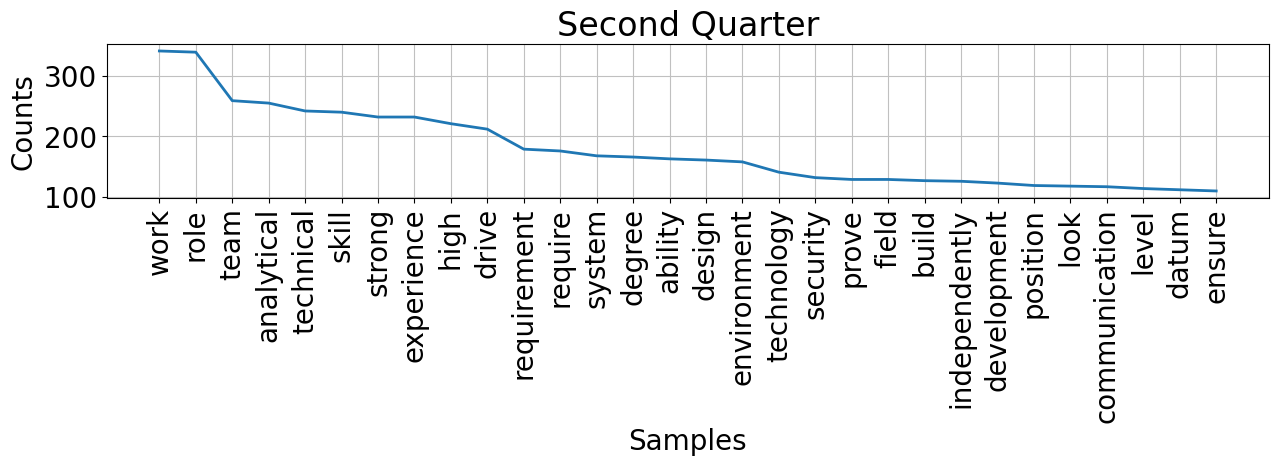

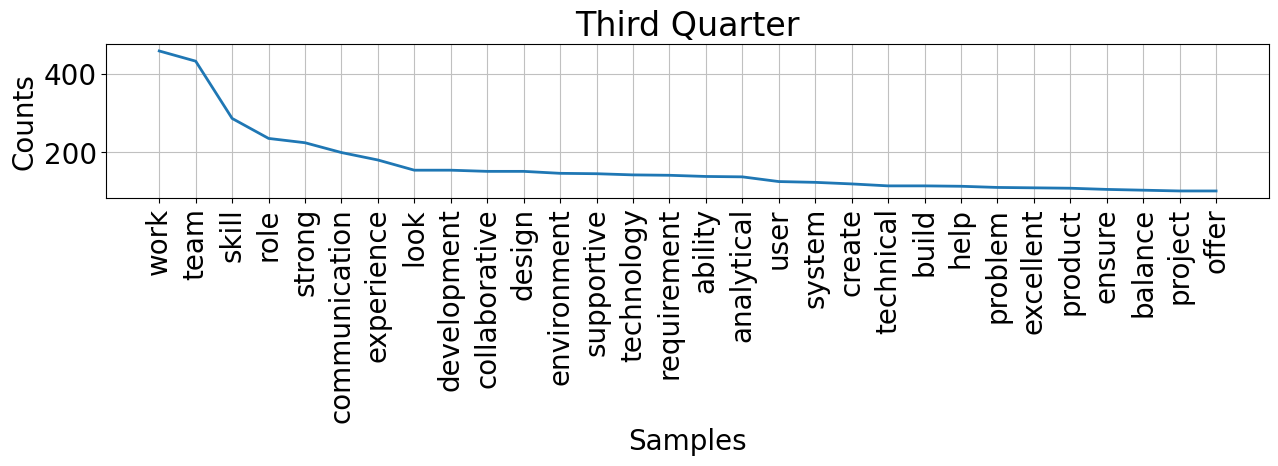

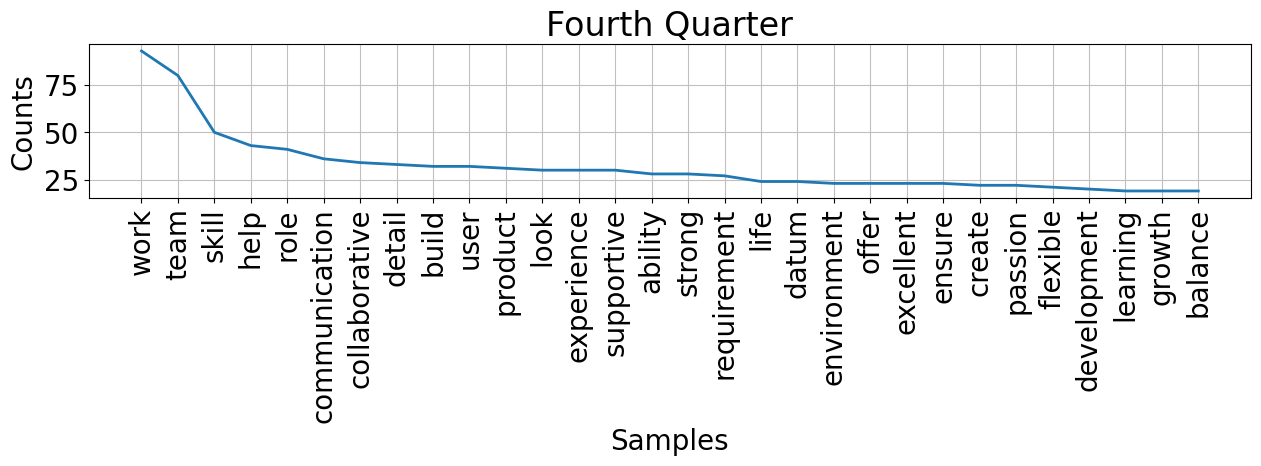

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '20'

plt.figure(figsize=(15,2))
freq_dic_1.plot(30,  title='First Quarter')
plt.figure(figsize=(15,2))
freq_dic_2.plot(30,  title='Second Quarter')
plt.figure(figsize=(15,2))

freq_dic_3.plot(30,  title='Third Quarter')
plt.figure(figsize=(15,2))

freq_dic_4.plot(30,  title='Fourth Quarter')